- Regresion logistica: La regresión logística es adecuada para problemas de clasificación donde la variable objetivo es categórica, por lo que no nos interesa. Probamos la regresion lineal: 

## regresion lineal

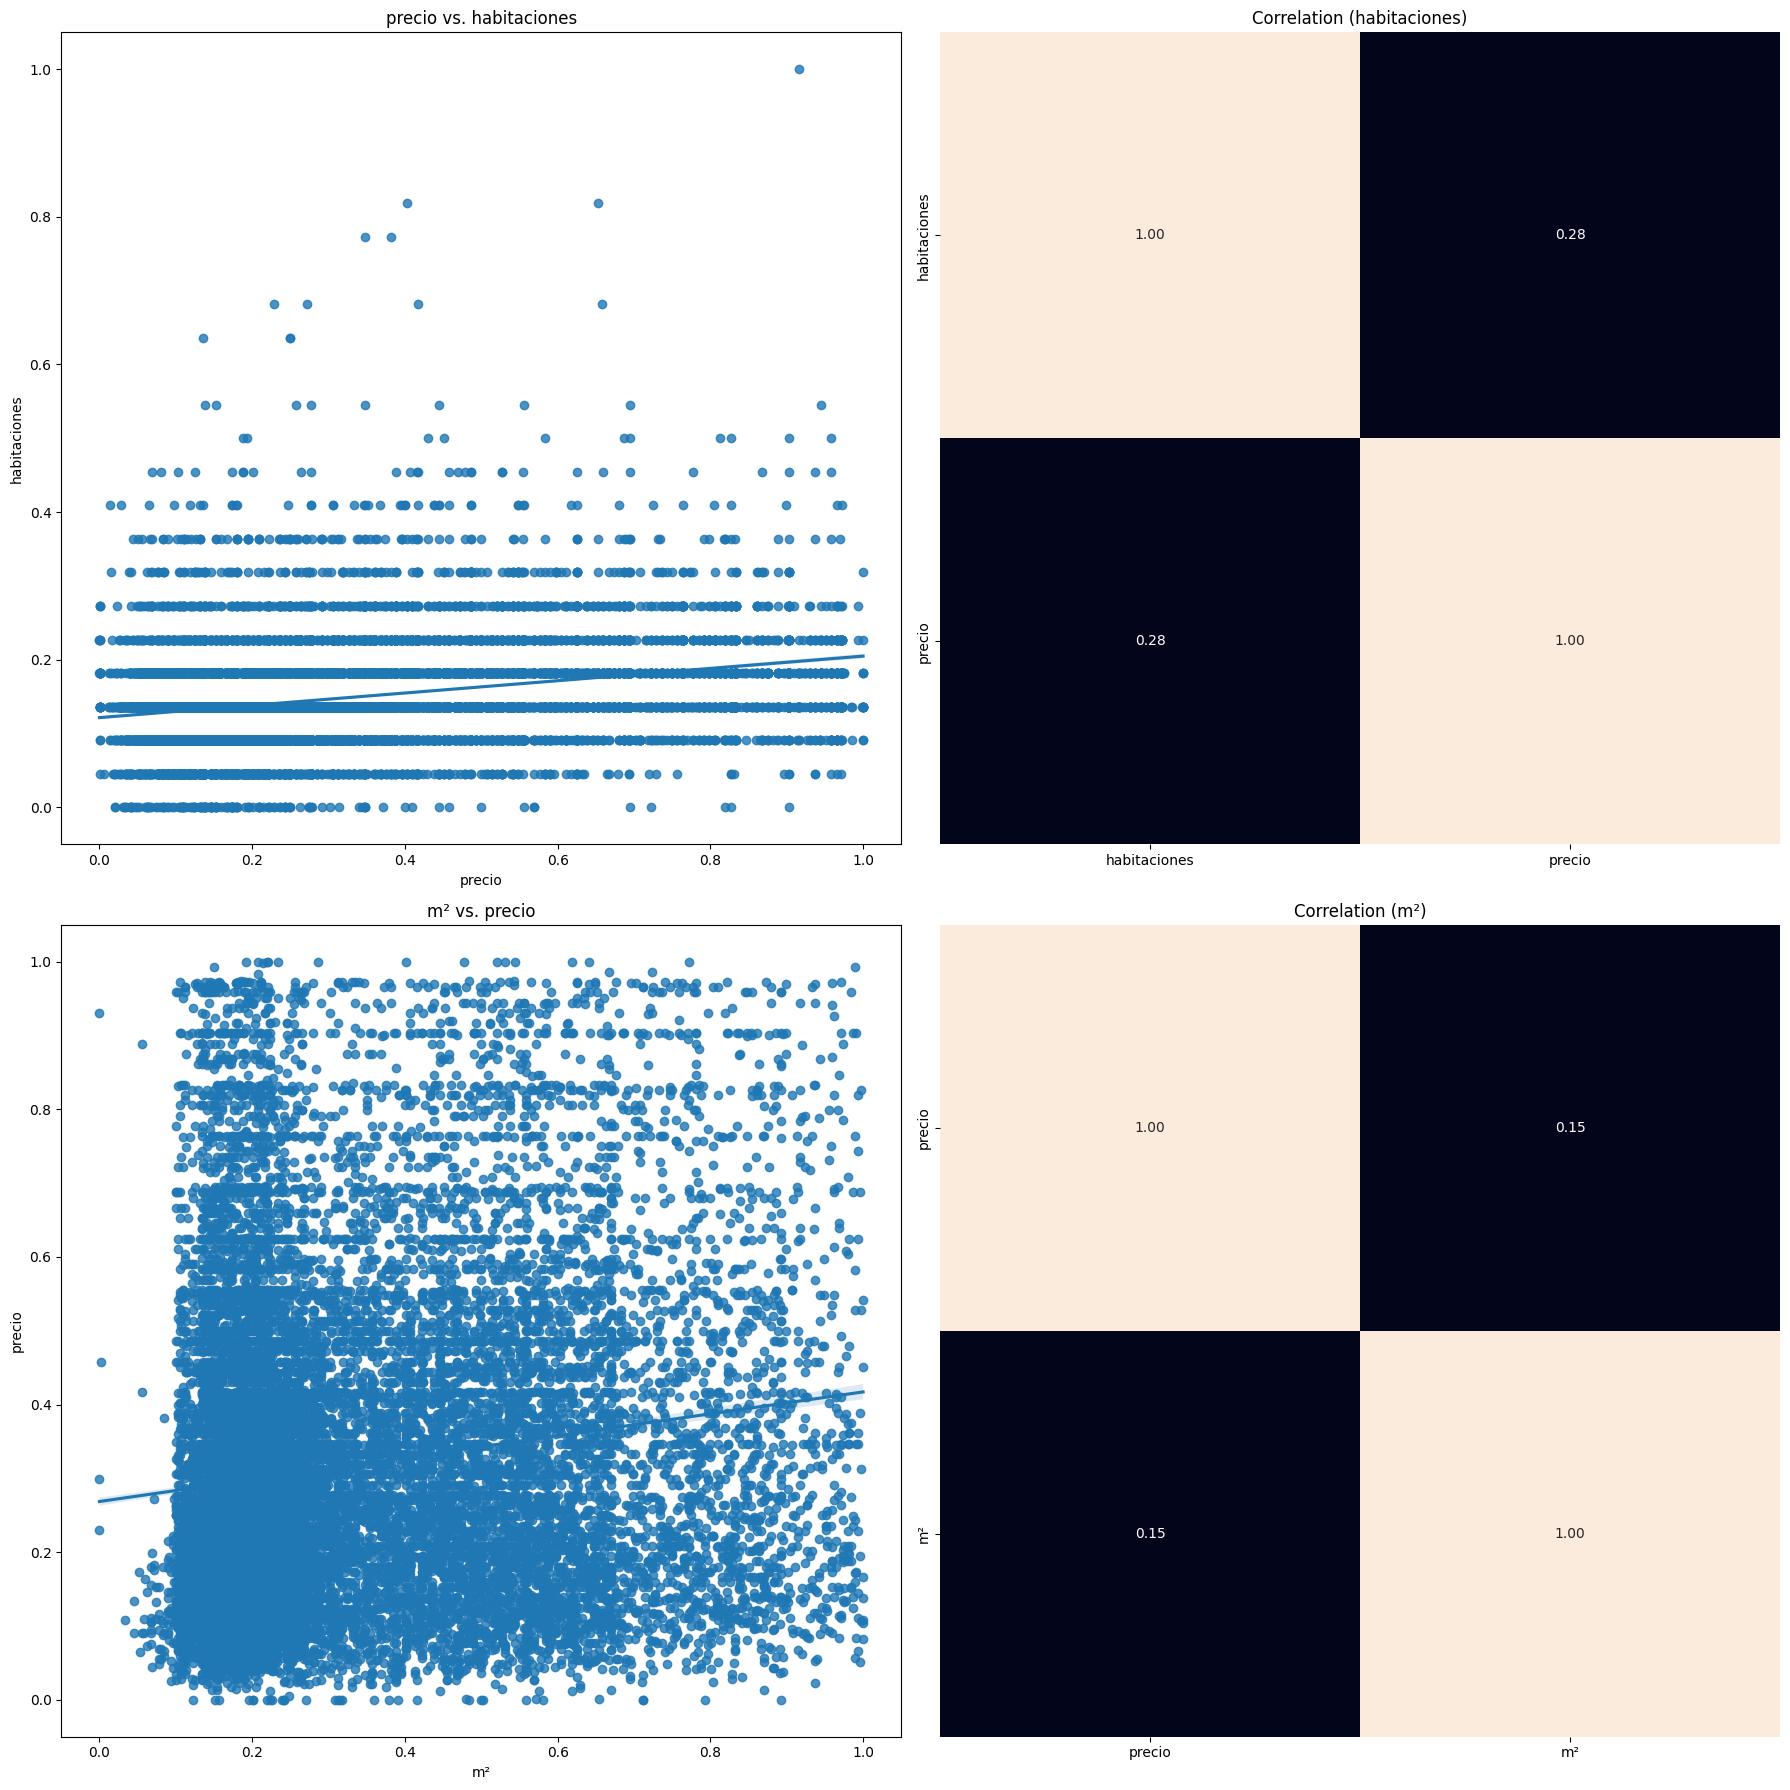

Intercepto (a): 0.15442718611409575
Coeficientes (b1, b2): [0.89688404 0.09216713]
Error cuadrático medio: 0.15859096898219308
Coeficiente de determinación (R2): 0.07096588771311096


In [83]:
# Paso 1: Lectura del conjunto de datos procesado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura de los datos de entrenamiento y prueba
train_data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/train_selected.csv')
test_data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/test_selected.csv')

train_data.head()

# Diagramas de dispersión y correlaciones
fig, axis = plt.subplots(2, 2, figsize=(18, 18))
total_data = pd.concat([train_data, test_data])

# Scatter Plot 1
sns.regplot(data=total_data, x="precio", y="habitaciones", ax=axis[0, 0])
axis[0, 0].set_title("precio vs. habitaciones")

# Heatmap 1
sns.heatmap(total_data[["habitaciones", "precio"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
axis[0, 1].set_title("Correlation (habitaciones)")

# Scatter Plot 2
sns.regplot(data=total_data, x="m²", y="precio", ax=axis[1, 0])
axis[1, 0].set_title("m² vs. precio")

# Heatmap 2
sns.heatmap(total_data[["precio", "m²"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("Correlation (m²)")

plt.tight_layout()
plt.show()

# Paso 2: Inicialización y entrenamiento del modelo
from sklearn.linear_model import LinearRegression

# Variables predictoras y variable objetivo
X_train = train_data[['habitaciones', 'm²']]
y_train = train_data['precio']
X_test = test_data[['habitaciones', 'm²']]
y_test = test_data['precio']

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Después del proceso de entrenamiento podemos conocer los parámetros que ha ajustado el modelo
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

# Paso 3: Predicción del modelo
y_pred = model.predict(X_test)

# Paso 4: Evaluación del modelo
from sklearn.metrics import mean_absolute_error, r2_score

print(f"Error cuadrático medio: {mean_absolute_error(y_test, y_pred)}")
print(f"Coeficiente de determinación (R2): {r2_score(y_test, y_pred)}")


In [79]:
train_data

,precio,habitaciones,m²
0,0.095802,0.181818,0.312500
1,0.208306,0.136364,0.183036
2,0.687489,0.272727,0.558036
3,0.247196,0.136364,0.241071
4,0.322199,0.181818,0.401786
...,...,...,...
14697,0.245668,0.136364,0.388393
14698,0.191639,0.136364,0.174107
14699,0.152748,0.181818,0.287946
14700,0.093024,0.181818,0.270089


In [80]:
test_data

,precio,habitaciones,m²
0,0.073579,0.181818,0.435268
1,0.687489,0.181818,0.531250
2,0.131914,0.181818,0.252232
3,0.204834,0.136364,0.247768
4,0.045800,0.090909,0.245536
...,...,...,...
3671,0.124970,0.136364,0.167411
3672,0.319421,0.181818,0.783482
3673,0.444425,0.136364,0.200893
3674,0.116636,0.136364,0.448661


In [77]:
y_pred

array([0.3576144 , 0.3664608 , 0.34074452, ..., 0.29524527, 0.31808133,
       0.39814325])

In [82]:
y_test

0       0.073579
1       0.687489
2       0.131914
3       0.204834
4       0.045800
          ...   
3671    0.124970
3672    0.319421
3673    0.444425
3674    0.116636
3675    0.577763
Name: precio, Length: 3676, dtype: float64

## optimizacion con gridsearch

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Definimos los hiperparámetros que queremos ajustar
hyperparams = {
    'copy_X': [True, False],
}

# Inicializamos la búsqueda en cuadrícula
grid = GridSearchCV(model, hyperparams, scoring='neg_mean_squared_error', cv=5)

# Realizamos la búsqueda en cuadrícula en los datos de entrenamiento
grid.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Obtenemos el mejor modelo
best_params = grid.best_params_
best_model = grid.best_estimator_

# Realizamos predicciones en los datos de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calculamos el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mostramos los resultados
print(f"Mejores hiperparámetros: {best_params}")
print(f"Test MSE: {mse}")


Mejores hiperparámetros: {'copy_X': True}
Mejores hiperparámetros: {'copy_X': True}
Test MSE: 0.0420305308513044


## optimizacion con random search

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define los hiperparámetros y sus posibles valores
param_dist = {'alpha': np.logspace(-3, 2, 100)}  # Valores de alpha en una escala logarítmica

# Inicializa la búsqueda aleatoria
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Realiza la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_params = random_search.best_params_
best_alpha = best_params['alpha']

# Obtiene el mejor modelo Ridge con los mejores hiperparámetros
best_ridge_model = random_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.029150530628251757
Test MSE (Ridge): 0.042030293824127145


In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
from skopt import BayesSearchCV

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define el espacio de búsqueda de hiperparámetros
param_dist = {'alpha': (1e-6, 100.0, 'log-uniform')}  # Rango de alpha en escala logarítmica

# Inicializa la optimización bayesiana
bayes_search = BayesSearchCV(ridge_model, param_dist, n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Realiza la optimización bayesiana en los datos de entrenamiento
bayes_search.fit(X_train, y_train)

# Obtiene el mejor valor de alpha y el mejor modelo Ridge
best_params = bayes_search.best_params_
best_alpha = best_params['alpha']
best_ridge_model = bayes_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.03593652225057267
Test MSE (Ridge): 0.04203023894756369


---

## regresion lineal regularizada

In [68]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Inicializa el modelo Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario

# Ajusta el modelo a los datos de entrenamiento
ridge_model.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_ridge = ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Calcula el coeficiente de determinación (R^2)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Test MSE (Ridge): {mse_ridge}")
print(f"Test R^2 (Ridge): {r2_ridge}")


Test MSE (Ridge): 0.042023558854985606
Test R^2 (Ridge): 0.07111999526968249


In [69]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Crear un modelo de regresión Lasso
lasso_model = Lasso()

# Definir una cuadrícula de hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Inicializar la búsqueda en cuadrícula con validación cruzada (CV)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_lasso_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Realizar predicciones en los datos de prueba
y_pred_lasso = best_lasso_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Mostrar resultados
print(f"Mejor valor de alpha: {best_alpha}")
print(f"Test MSE (Lasso): {mse_lasso}")
print(f"Test R^2 (Lasso): {r2_lasso}")


Mejor valor de alpha: 0.001
Test MSE (Lasso): 0.04212519436584406
Test R^2 (Lasso): 0.06887346507616054


## optimizacion con gridsearch

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define los hiperparámetros y sus posibles valores
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Inicializa la búsqueda en cuadrícula
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_
best_alpha = best_params['alpha']

# Obtiene el mejor modelo Ridge con los mejores hiperparámetros
best_ridge_model = grid_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha: {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha: 0.01
Test MSE (Ridge): 0.04203044930301829


## optimizacion con random search

In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define los hiperparámetros y sus posibles valores
param_dist = {'alpha': np.logspace(-3, 2, 100)}  # Valores de alpha en una escala logarítmica

# Inicializa la búsqueda aleatoria
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Realiza la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_params = random_search.best_params_
best_alpha = best_params['alpha']

# Obtiene el mejor modelo Ridge con los mejores hiperparámetros
best_ridge_model = random_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.029150530628251757
Test MSE (Ridge): 0.042030293824127145


## optimizacion bayesana

In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
from skopt import BayesSearchCV

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define el espacio de búsqueda de hiperparámetros
param_dist = {'alpha': (1e-6, 100.0, 'log-uniform')}  # Rango de alpha en escala logarítmica

# Inicializa la optimización bayesiana
bayes_search = BayesSearchCV(ridge_model, param_dist, n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Realiza la optimización bayesiana en los datos de entrenamiento
bayes_search.fit(X_train, y_train)

# Obtiene el mejor valor de alpha y el mejor modelo Ridge
best_params = bayes_search.best_params_
best_alpha = best_params['alpha']
best_ridge_model = bayes_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.03593652225057267
Test MSE (Ridge): 0.04203023894756369


---

## DECISION TREE

In [73]:
# Paso 1. Lectura del conjunto de datos procesado


import pandas as pd
from sklearn.model_selection import train_test_split

# Cargando el nuevo conjunto de datos desde la URL
data = pd.read_csv(r'/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv finales/comunidades_FINAL_1500.csv')

# Dividiendo el conjunto de datos en características (X) y etiquetas (y)
X = data.drop("precio", axis=1)
y = data["precio"]

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrando las primeras filas del conjunto de entrenamiento
print(X_train.head())

          com. autonoma       provincia descripción  habitaciones   m²
15712    Islas Baleares  Islas Baleares      Chalet             4  247
7167           Cataluña       Tarragona      Chalet             6  303
19949  Región de Murcia          Murcia        Piso             4   90
17598          Canarias      Las Palmas      Chalet             2  381
1157          Andalucía          Málaga      Chalet             4  514


In [76]:
import pandas as pd
import plotly.express as px

total_data = X
total_data["precio_categoria"] = pd.cut(y, bins=[0, 100, 200, 300], labels=["Bajo", "Medio", "Alto"])

# Crear el gráfico de coordenadas paralelas con Plotly Express
fig = px.parallel_coordinates(total_data, dimensions=["precio_categoria"] + list(total_data.columns[:-1]))

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed